# **K-Mean Clustering**

## **Apa Itu K-Mean Clustering?**
K-Means clustering adalah algoritma unsupervised machine learning yang digunakan untuk mengelompokkan data ke dalam kelompok-kelompok (kluster) berdasarkan kemiripan karakteristik. Algoritma ini bertujuan untuk meminimalkan jarak antar titik data dalam satu kluster dan memaksimalkan jarak antar kluster.

## **Tujuan dan Langkah-langkah**
**Tujuan**:
K-Means berusaha untuk meminimalkan variasi data dalam setiap kluster dan memaksimalakan variasi data antar kluster.

**Langkah-langkah:**

**Menentukan Jumlah Kluster (k):** Anda harus menentukan jumlah kluster yang diinginkan sebelum menjalankan algoritma.

**Inisialisasi Sentroid:** Sentroid (pusat kluster) diinisialisasi secara acak atau dengan metode tertentu.

**Penugasan Kluster**: Setiap titik data ditugaskan ke kluster terdekat dengan sentroidnya.

**Pemutakhiran Sentroid**: Sentroid kluster dihitung kembali berdasarkan rata-rata titik data dalam kluster tersebut.

**Iterasi**: Langkah 3 dan 4 diulang hingga sentroid tidak berubah atau konvergen.

## **Implementasi**

Import library yang diperlukan dan upload dataset yang belum dihapus label nya

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv("/workspaces/pendata/tugas/iris.csv")
data.head()

,id,Class,petal length,petal width,sepal length,sepal width
0,1,Iris-setosa,1.4,0.2,5.1,3.5
1,2,Iris-setosa,1.4,0.2,4.9,3.0
2,3,Iris-setosa,1.3,0.2,4.7,3.2
3,4,Iris-setosa,1.5,0.2,4.6,3.1
4,5,Iris-setosa,1.4,0.2,5.0,3.6


**Menghapus label Class pada dataset iris**

load_iris() memuat data iris dari scikit-learn. Dataset ini terdiri dari:

Fitur (fitur numerik): sepal length, sepal width, petal length, petal width

Target (label): class (jenis bunga: setosa, versicolor, virginica)

iris.data berisi hanya fitur numerik (tanpa kolom class).

pd.DataFrame(..., columns=...) membuat DataFrame pandas tanpa menyertakan kolom class.

In [17]:
# Load data iris (tanpa kolom class)
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

Jumlah Cluster: 2
  SSE: 152.34795176035797
  Silhouette Score: 0.6810461692117462

Jumlah Cluster: 3
  SSE: 78.85566582597727
  Silhouette Score: 0.551191604619592

Jumlah Cluster: 4
  SSE: 57.350880212954756
  Silhouette Score: 0.49764331793219224



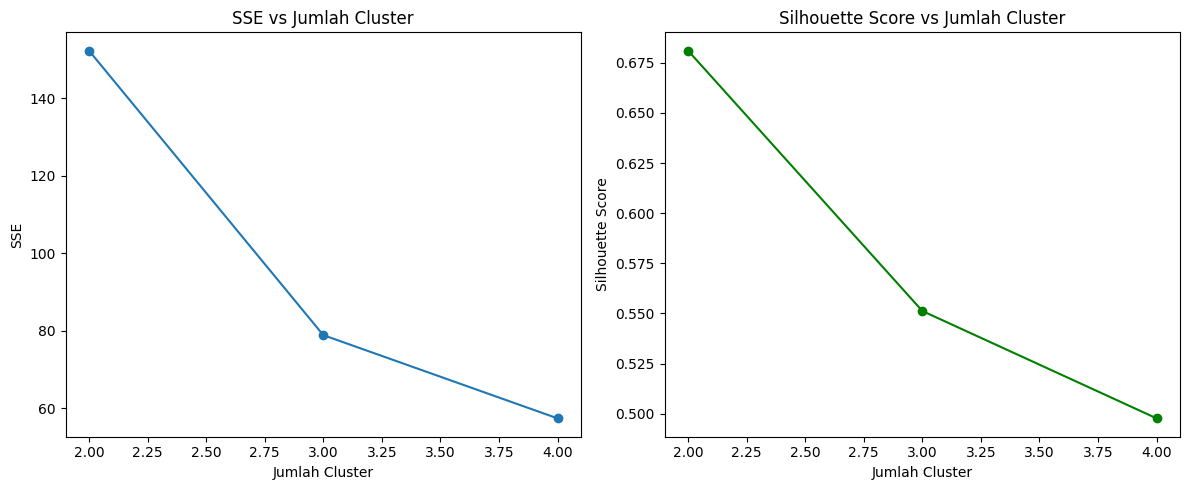

In [18]:
# Simpan hasil untuk SSE dan Silhouette
sse = []
silhouette = []

# Coba jumlah cluster dari 2 sampai 4
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data)

    sse.append(kmeans.inertia_)  # SSE
    silhouette.append(silhouette_score(data, cluster_labels))  # Silhouette

# Tampilkan hasil
for i, k in enumerate(range(2, 5)):
    print(f"Jumlah Cluster: {k}")
    print(f"  SSE: {sse[i]}")
    print(f"  Silhouette Score: {silhouette[i]}\n")

# Visualisasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 5), sse, marker='o')
plt.title('SSE vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(range(2, 5), silhouette, marker='o', color='green')
plt.title('Silhouette Score vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


##**Kesimpulan**
Jumlah klaster terbaik adalah 2, berdasarkan nilai silhouette score tertinggi.
Meskipun SSE makin kecil saat jumlah klaster meningkat, silhouette score menurun, yang berarti klaster tidak sejelas saat dibagi 2.

